<h1>Introduction to JSON</h1>

JSON stands for JavaScript Object Notation.

It's not tabular data, this makes them more efficient for data storage because if a value doesn't exist for a record, the attribute can be ommited instead of storing it with a null value.

Data is organized into collections of objects. This are collections of attribute-value pairs.

JSON's can be nested, values themselves can be objects or lists of objects.

We can load a json into a DataFrame with pd.read_json()

    It takes a string path to the JSON file or a URL ending in .json. We can also supply JSON data directly as a string.

Pandas guesses attribute data types but we can specify them with a dictionary of column names and values using the dtype argument.

JSON data can be laid out in various ways, so there is an orient keyword argument to flag uncommon layouts. This is because JSON data is not tabular, so, pandas guesses how to arrange it in a table. 

<h2>Record orientation</h2>

IS the most common.

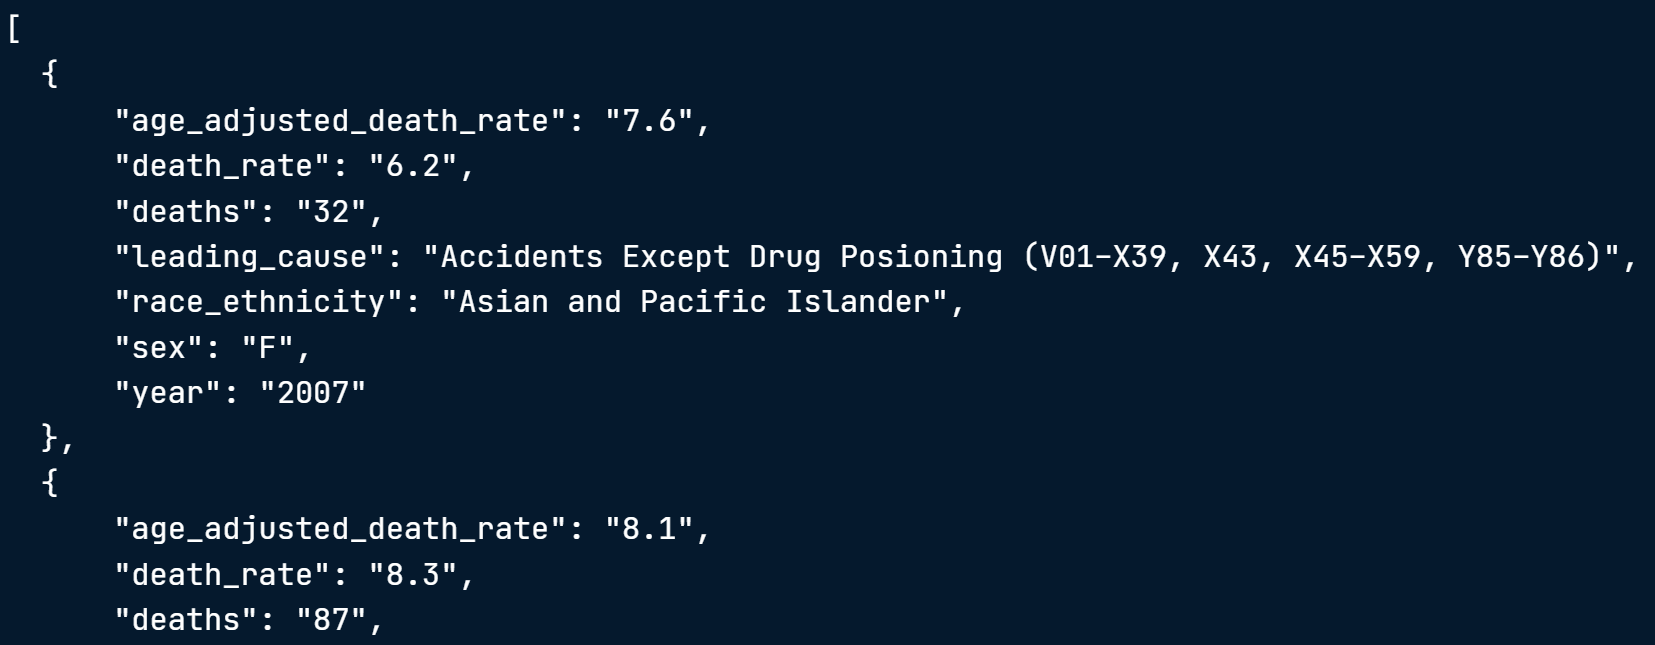

<h2>Column orientation</h2>

It's used to reduce the file size by not repeating attribute names.

IN this orientation, the entire JSON is a dictionary in which the keys are the column names and the values are lists of values for that column or dictionaries of row indices and column values.

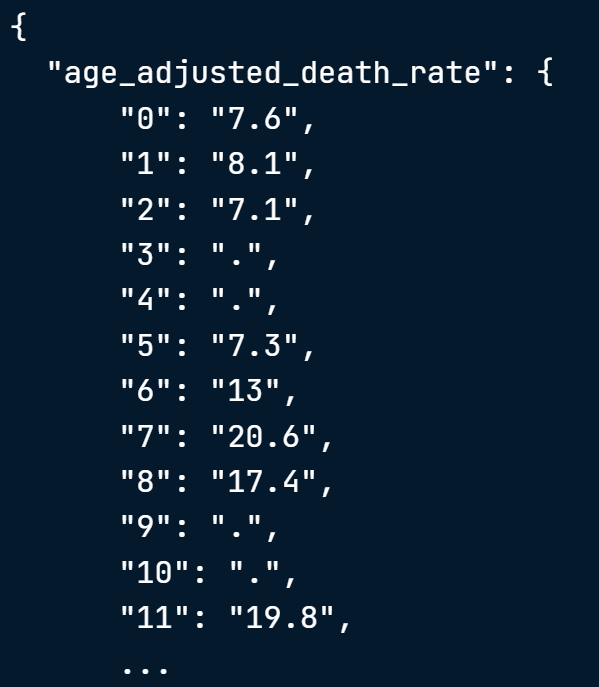

<h3>Specifying Orientation</h2>

<h3>Split oriented</h3>

Different lists for column names, indices, and values.

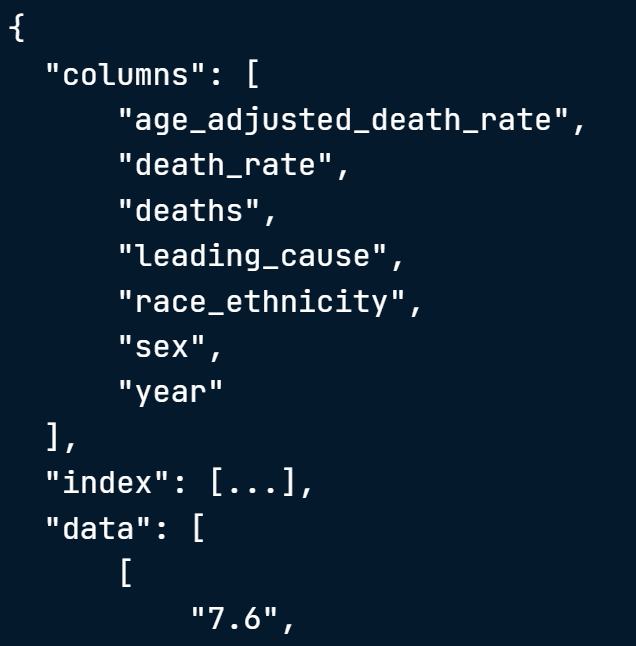

the orient argument takes a string values to set the orientation of the JSON.

In [3]:
import pandas as pd

death_causes = pd.read_json('Datasets/dhs_daily_report.json')# New York City Department of Homeless Services Daily Report

print(death_causes.describe())

       adult_families_in_shelter  adults_in_families_with_children_in_shelter  \
count                1000.000000                                  1000.000000   
mean                 2074.955000                                 16487.932000   
std                   148.020238                                   848.363772   
min                  1796.000000                                 14607.000000   
25%                  1906.000000                                 15831.500000   
50%                  2129.000000                                 16836.000000   
75%                  2172.250000                                 17118.250000   
max                  2356.000000                                 17733.000000   

       children_in_families_with_children_in_shelter  \
count                                    1000.000000   
mean                                    23273.873000   
std                                       926.243984   
min                                     21291.

<hr>
<h1>Introduction to API's</h1>

API stands for Application Programming interfaces, which are the most common source of JSON data.

They are a defined way for an application to communicate with other programs and vice versa.

They allow us to get data from an apllication without knowing the application's database architecture

They are shared resources, and often limit how much data you can get in a specified timeframe

<h2>Understanding APIs with an analogy</h2>

1. It's like using a catalog to order products. They show what's available and provides order intstructions. 
2. Send a properly formed order to the right address.
3. Receive what we asked for

1. They have a lot of methods that return different information
2. An API provides an endpoint to send requests to
3. Receive what we asked for in a specefic format

They must include a documentation to describe what a request should look like, such as parameters to include.

There are many different libraries geared towards popular APIs, in the course we are going to use Requests library.



<hr>

<h1>Requests Library</h1>

It lets users send and get data from any URL. This means that is not tied to a particular API.

We can use requests.get() to retrieve data from a URL.

        It takes a string of the URL to get data from
        We can also use a params argument which takes a dictionary of parameters and values to customize API requests
        The headers argument which takes a dictionary and can be used to provide user authentication to the API.

<h2>Result</h2>

The response object contains data and metadata.
In order to get only the data we have to use the function response.json() which will return the data as a dictionary. To load the response into a DataFrame we have to use the pd.DataFrame() method.


<h2>Using data from Yelp</h2>

It lets users submit ratings and reviews fro businesses and makes that data available via its APIs

Check the response format whenever you work with a new API -- chances are the data you need is nested under a dictionary key, like here.

In [ ]:
import pandas as pd
import requests
from os import environ as env
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

api_url = 'https://api.yelp.com/v3/businesses/search'#API endpoint

parameters = {'term': 'bookstore',
            'location': 'San Francisco'}#Parameters according to the documentation

headers = {'Authorization': 'Bearer {}'.format(env['api_key'])}#Needed headers according to the documentation.

#Call the API
response = requests.get(api_url, params=parameters, headers=headers)

data = response.json()

print(data)

#Load it into a DataFrame

bookstores = pd.DataFrame(data['businesses'])

print(bookstores.head(2))

<h1>Restructuring Nested JSON data</h1>

A JSON is nested when a vaue is itself an object.

Pandas has a function to flatten nested JSONs. This function is in a submodule that doesn't normally load when importing pandas.

<h2>pandas.io.json</h2>

It's a submodule that has tools for reading and writing JSON. It has to be imported explicity.

<h3>json_normalize()</h3>

With this function we can flatten nested data.

It takes a dictionary or list of dictionaries and returns a flattened DataFrame.

Nested attribute column names follow the default pattern: attribute.nestedAttribute

The dot separator interferes with pandas dot notation for column selection so we have to use a different separator with the sep argument.

If there's deeply nested data, we may write a custom flattening function or leave it if it's irrelevant for the analysis.

We can also use JSON normalize's record_path, meta and meta prefix arguments:

- record_path: takes a string or list of strings of attributes to the nested data, it's like listing folders in a file path. They are the other attributes that we want to have as sepparated columns.
- meta: Takes a list of higher-level attributes to include in the resulting DataFrame. We can also pass sub-lists with records paths to flatten data.
- meta_prefix: To avoid duplicate columns, is a string to meta column names.
<h3>Example of flatten json</h3>

{"Parent":{"child1": 1, "child2": 2}}

After nesting it, the data will look like:

Parent_child1 : 1

Parent_child2 : 2

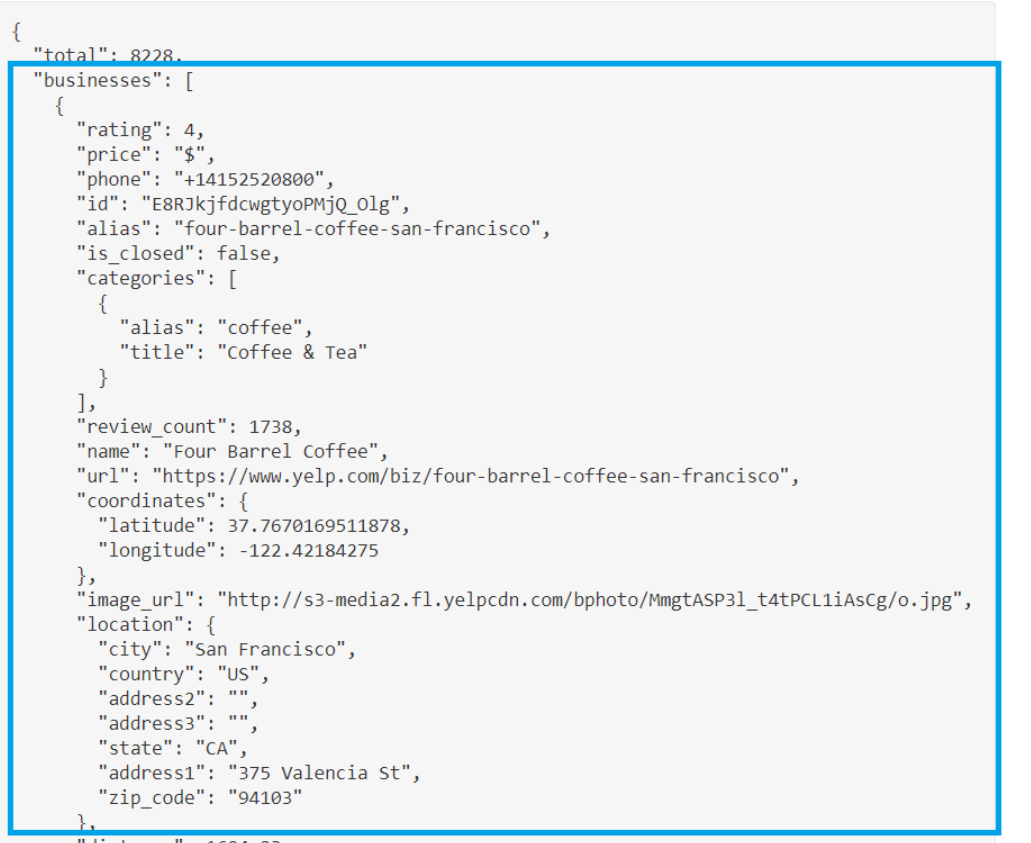

If we only specify the record_path, 

In [ ]:
import pandas as pd
import requests
from pandas.io.json import json_normalize

api_url = 'https://api.yelp.com/v3/businesses/search'#API endpoint

parameters = {'term': 'bookstore',
            'location': 'San Francisco'}#Parameters according to the documentation

headers = {'Authorization': 'Bearer {}'.format(env['api_key'])}#Needed headers according to the documentation.

#Call the API
response = requests.get(api_url, params=parameters, headers=headers)

data = response.json()#Nested data

bookstores = json_normalize(data['businesses'], sep='_')#Returns a DataFrame with flatten data

print(list(bookstores))

#Going for deeply nested data
flat_cafes = json_normalize(data["businesses"],
                            sep="_",
                    		record_path="categories",#The attribute that we want to flat
                    		meta=['name', 
                                  'alias',  
                                  'rating',
                          		  ['coordinates', 'latitude'], 
                          		  ['coordinates', 'longitude']],
                    		meta_prefix='biz_')#Returns a DataFrame with flatten data

<hr>
<h1>Combining multiple datasets</h1>

Pandas has methods for combining datasets

<h2>append() method</h2>

Is a dataframe method that takes the dataframe to add on as an argument.

If the dataframes use pandas' default index of row numbers, we should also set ignore_index=True. By doing so, the resulting dataframe will have relabeled rows, rather than two row 0s, two row 1s, and so on.

 If you were putting multiple dataframes together, one option would be to start with an empty dataframe and use a for or while loop to append additional ones.

<h2>APIs</h2>
APIs often limit the amount of data returned, since sending large datasets can be time- and resource-intensive.

They commonly limit the number of records returned in a single call to manage resource usage.
We can set a param['offset']= numOfRecords to get the next ones, its like a sum to the default limit value.

 By modifying the offset, we can get results 1-50 in one call and 51-100 in another.


In [11]:
df1 = pd.DataFrame([{'col1': 'val1'}, {'col1': 'val2'}, {'col1': 'val3'}])
df2 = pd.DataFrame([{'col4': 'val4'}, {'col4': 'val5'}, {'col4': 'val6'}])

print(df1)
dfAppended = df1.append(df2)
print()
print(dfAppended)#If we only append it, we are going to have repeated indexes
print('With ignore_index=True')
dfSingle = df1.append(df2, ignore_index=True)
print(dfSingle)

   col1
0  val1
1  val2
2  val3

   col1  col4
0  val1   NaN
1  val2   NaN
2  val3   NaN
0   NaN  val4
1   NaN  val5
2   NaN  val6
With ignore_index=True
   col1  col4
0  val1   NaN
1  val2   NaN
2  val3   NaN
3   NaN  val4
4   NaN  val5
5   NaN  val6


<h2>Combine data by adding columns</h2>

Panda has a way to perform joins, like SQL joins.

It uses merge().

<h3>merge()</h3>

Is a pandas function and a dataframe method.

For the dataframe method it takes as arguments:

- The second dataframe to merge
- strings of the columns to merge on. If key column names match in both dataframes, we can specify the name with the 'on' keyword argument. If they are different, we have to use left_on and right_on keyword arguments.

They key column must be the same data type for the merge to work properly.

By default, merge returns only rows with key values that exist in both datasets. It assumes a 1-1 relationship, if we have multiple matches, the result will have one row for each possible link.



In [ ]:
# Merge crosswalk into cafes on their zip code fields
cafes_with_pumas = cafes.merge(crosswalk, left_on='location_zip_code', right_on='zipcode')



# Merge pop_data into cafes_with_pumas on puma field
cafes_with_pop = cafes_with_pumas.merge(pop_data, on='puma')

# View the data
print(cafes_with_pop.head())